In [2]:
library(rstan)
library(brms)
library(here)
library(ggplot2)
library(bayesplot)

# 計算の高速化
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

file_beer_sales_2 <- read.csv(here("data", "3-2-1-beer-sales-2.csv"))
sample_size <- nrow(file_beer_sales_2)


要求されたパッケージ StanHeaders をロード中です


rstan version 2.32.6 (Stan version 2.32.2)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


要求されたパッケージ Rcpp をロード中です

Loading 'brms' package (version 2.21.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


次のパッケージを付け加えます: ‘brms’


以下のオブジェクトは ‘package:rstan’ からマスクされています:

    loo


以下のオブジェクトは ‘package:stats’ からマスクされています:

    ar


here() starts at /media/e595/Game/プロジェクト置き場/RとStanで始めるベイズ統計モデリング

This is bayesplot version 1.11.1

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot:

In [7]:
# 単回帰モデルを作る
simple_lm_brms <- brm(
  formula = sales ~ temperature,
  family = gaussian(link = "identity"), # 正規分布
  data = file_beer_sales_2,
  seed = 1
)


Compiling Stan program...

Start sampling



In [10]:
simple_lm_brms


 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: sales ~ temperature 
   Data: file_beer_sales_2 (Number of observations: 100) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Regression Coefficients:
            Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept      21.13      5.85     9.84    32.77 1.00     3841     2733
temperature     2.46      0.28     1.91     3.01 1.00     3939     2971

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma    17.02      1.23    14.85    19.72 1.00     3773     2858

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

In [5]:
as.mcmc(simple_lm_brm, combine_chains = TRUE)


Warning message:
“as.mcmc.brmsfit is deprecated and will eventually be removed.”


Markov Chain Monte Carlo (MCMC) output:
Start = 4001 
End = 8000 
Thinning interval = 1 
          parameters
iterations b_Intercept b_temperature    sigma Intercept    lprior      lp__
      [1,]   15.951899      2.797930 17.51331  71.43764 -7.755323 -429.4889
      [2,]   20.959037      2.570235 16.97736  71.92937 -7.730935 -429.0341
      [3,]   16.495095      2.649795 16.88523  69.04319 -7.736466 -428.6314
      [4,]   17.190548      2.653470 16.74610  69.81151 -7.724866 -428.4903
      [5,]   21.845715      2.382516 16.88288  69.09340 -7.735954 -428.4266
      [6,]   22.065817      2.472757 14.08074  71.10306 -7.606182 -431.8809
      [7,]   21.090610      2.462963 16.11700  69.93363 -7.696078 -428.3805
      [8,]   20.847321      2.455254 17.25719  69.53746 -7.749870 -428.3817
      [9,]   29.469377      2.007747 15.92266  69.28502 -7.691604 -429.9931
     [10,]   21.179891      2.438226 17.59360  69.53235 -7.765497 -428.5404
     [11,]   20.939997      2.459138 16.03249  69.7071

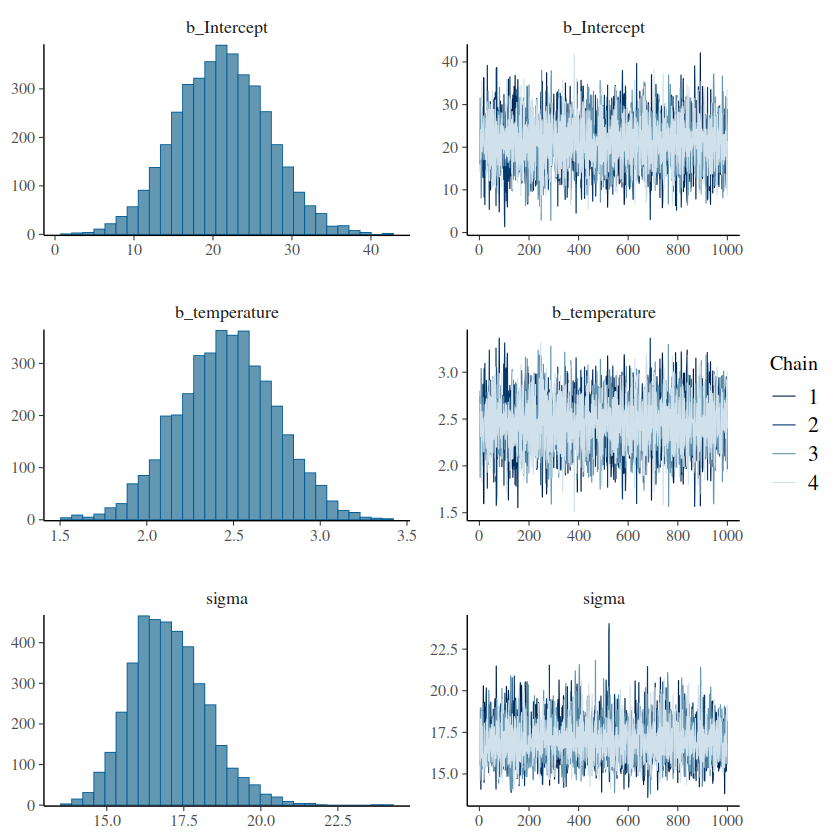

In [6]:
# 事後分布
plot(simple_lm_brm)


In [7]:
# 複雑なformulaはbf関数で作成
simple_lm_formula <- bf(sales ~ temperature)


In [8]:
simple_lm_brm_2 <- brm(
  formula = simple_lm_formula,
  family = gaussian(),
  data = file_beer_sales_2,
  seed = 1,
  chains = 4,
  iter = 2000,
  warmup = 1000,
  thin = 1 # 間引き数(1なら間引きなし)
)


Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



In [11]:
# 事前情報分布の確認
prior_summary(simple_lm_brms)
# classの列はパラメータの役割
# prior が事前分布の一覧


prior,class,coef,group,resp,dpar,nlpar,lb,ub,source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
,b,,,,,,,,default
,b,temperature,,,,,,,default
"student_t(3, 71.5, 20)",Intercept,,,,,,,,default
"student_t(3, 0, 20)",sigma,,,,,,0,,default


In [12]:
# 事前分布を無情報事前分布にする
simple_lm_brm_3 <- brm(
  formula = simple_lm_formula,
  family = gaussian(),
  data = file_beer_sales_2,
  seed = 1,
  prior = c(
    set_prior("", class = "Intercept"),
    set_prior("", class = "sigma")
  )
)


Compiling Stan program...

Start sampling



In [13]:
# どのような事前分布がしていされるのか予め知りたいときにget_prior
get_prior(
  formula = sales ~ temperature,
  family = gaussian(),
  data = file_beer_sales_2
)


prior,class,coef,group,resp,dpar,nlpar,lb,ub,source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
,b,,,,,,,,default
,b,temperature,,,,,,,default
"student_t(3, 71.5, 20)",Intercept,,,,,,,,default
"student_t(3, 0, 20)",sigma,,,,,,0,,default


Warning message:
“Method 'stanplot' is deprecated. Please use 'mcmc_plot' instead.”
Warning message:
“Argument 'pars' is deprecated. Please use 'variable' instead.”


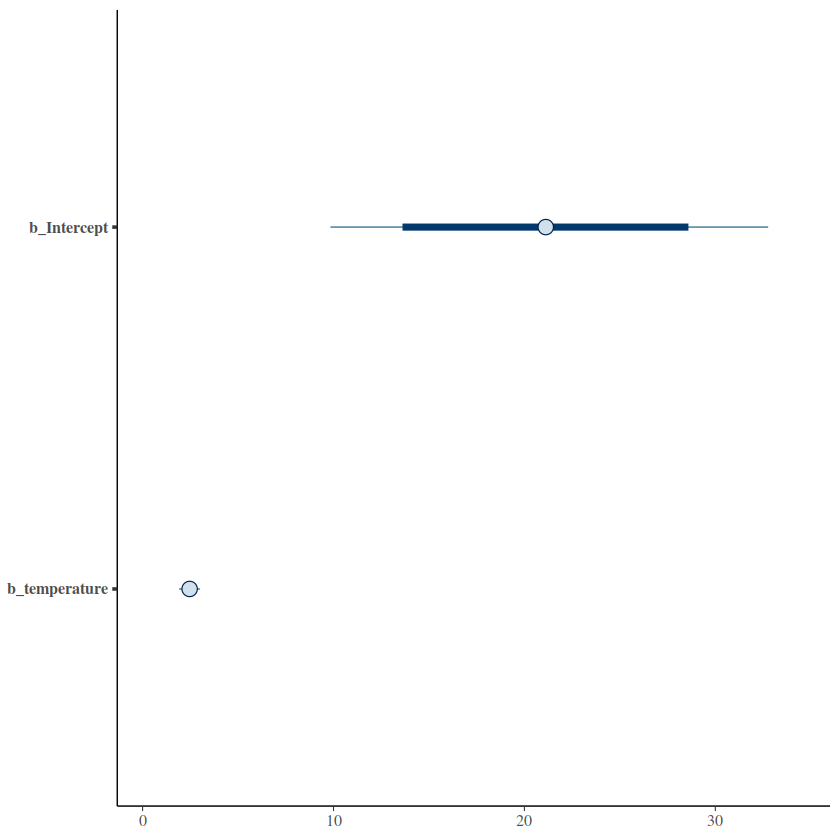

In [14]:
# brmsで事後分布可視化
# parsで描画対象のパラメータ
stanplot(
  simple_lm_brms,
  type = "intervals", # グラフの種類
  pars = "^b",
  prob = 0.8,
  prob_outer = 0.95
)


In [6]:
# brmsによる予測
# 気温が20度のときの売上の予測
new_data <- data.frame(temperature = 20)


In [19]:
# 回帰直線の信用区間付き予測値
fitted(simple_lm_brms, new_data)


Estimate,Est.Error,Q2.5,Q97.5
70.35104,1.672152,67.02781,73.6357


In [20]:
# 予測区間付きの予測値
set.seed(1)
predict(simple_lm_brms, new_data)


Estimate,Est.Error,Q2.5,Q97.5
70.41107,17.71827,34.29629,104.9866


In [8]:
# predictなしで予測の実装
# MCMCサンプル取り出し
mcmc_sample <- as.mcmc(simple_lm_brms, combine_chains = TRUE)


Warning message:
“as.mcmc.brmsfit is deprecated and will eventually be removed.”


In [9]:
# 推定されたパラメータ別に保存
mcmc_b_Intercept <- mcmc_sample[, "b_Intercept"]
mcmc_b_temperature <- mcmc_sample[, "b_temperature"]
mcmc_sigma <- mcmc_sample[, "sigma"]


In [10]:
saigen_fitted <- mcmc_b_Intercept + 20 * mcmc_b_temperature


In [11]:
# 予測分布のmcmcを得る
set.seed(1)
saigen_predict <- do.call(
  rnorm,
  c(4000, list(mean = saigen_fitted, sd = mcmc_sigma))
)


In [12]:
# predictの再現
print(mean(saigen_predict))
print(quantile(saigen_predict, probs = c(0.025, 0.975)), )
set.seed(1)
predict(simple_lm_brms, data.frame(temperature = 20))


[1] 70.41107
     2.5%     97.5% 
 34.29629 104.98660 


Estimate,Est.Error,Q2.5,Q97.5
70.41107,17.71827,34.29629,104.9866


Warning message:
“Method 'marginal_effects' is deprecated. Please use 'conditional_effects' instead.”


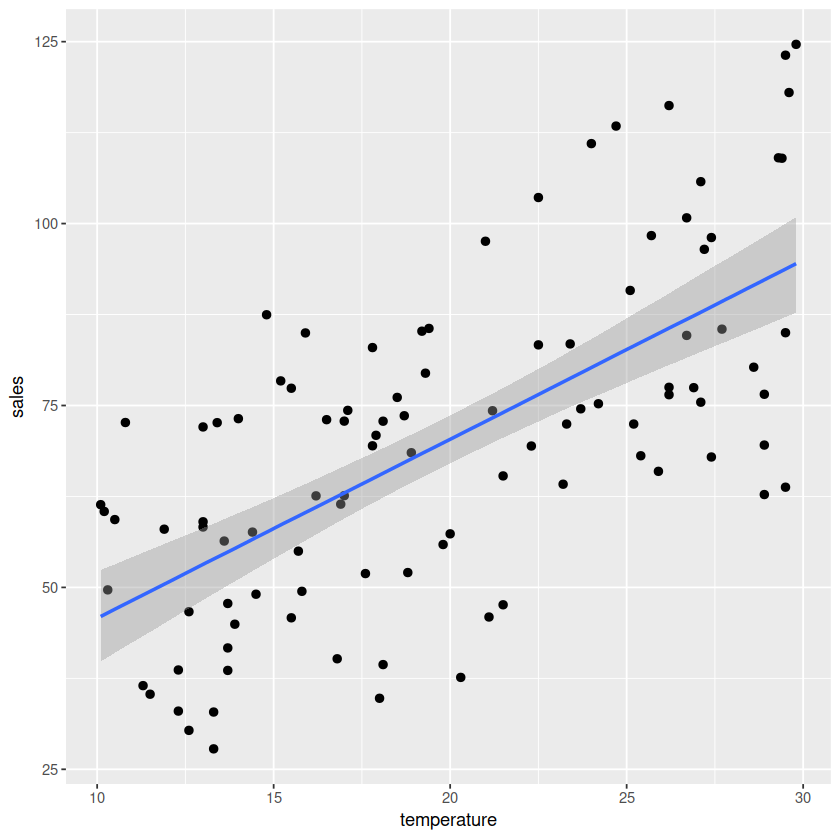

In [13]:
# 回帰直線の図示
# 95%ベイズ信用区間付き
eff <- marginal_effects(simple_lm_brms)
plot(eff, points = TRUE)


Warning message:
“Method 'marginal_effects' is deprecated. Please use 'conditional_effects' instead.”


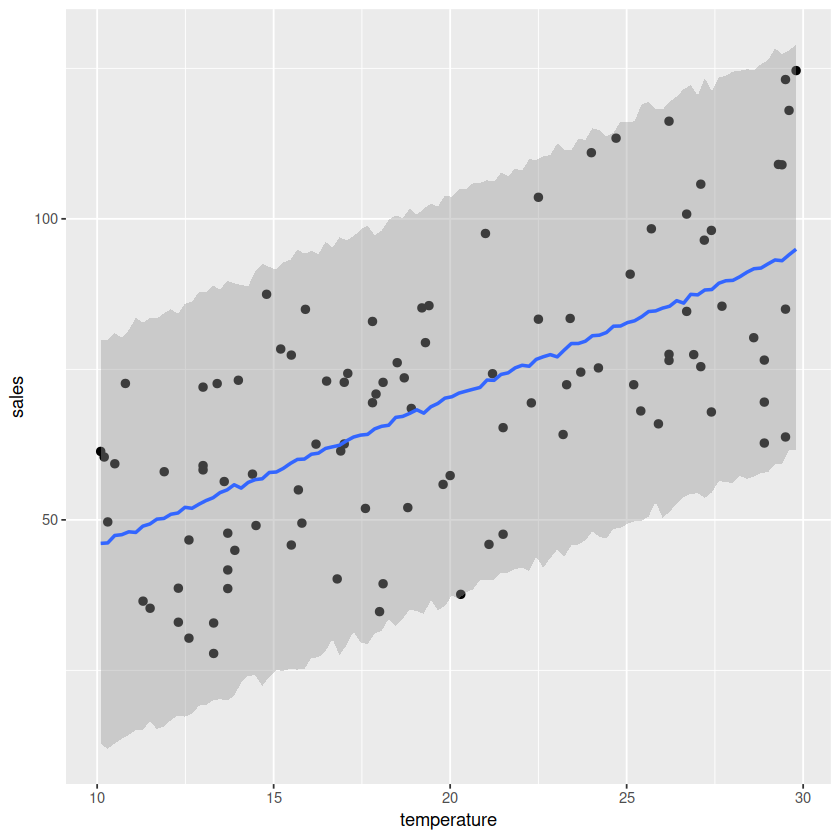

In [17]:
# 95% 予測区間付き
# 回帰直線の図示
# 95%ベイズ信用区間付き
set.seed(1)
eff_pre <- marginal_effects(simple_lm_brms, method = "predict")
plot(eff_pre, points = TRUE)
